# 모듈 불러오기

# 도중에 순서가 꼬이기도 해서 보기 불편하실 겁니다 :(

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackEnd.figure_format = 'retina'


#### 분석

In [5]:
from scipy.stats import  pearsonr,


# 데이터 로드

In [127]:
df = pd.read_csv('병합데이터.csv')  
df

,PARK_SN,공원명,행정동,x,y,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,...,행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도,행정동 독거노인수,행정동 독거노인비율,행정동 독거노인밀도,기초생활수급자 고령인구수 (생계/주거/의료),기초생활수급자 고령인구밀도 (생계/주거/의료)
0,1,NaN,가양1동,126.847068,37.570200,1510,3,5,8,5,...,4.70,7310,3106,0.09,660.85,539,0.02,114.68,83,17.66
1,2,엄지공원,가양2동,126.854735,37.565807,1510,6,5,2,5,...,1.00,13902,4083,0.29,4083.00,1690,0.12,1690.00,1673,1673.00
2,3,NaN,가양2동,126.854505,37.563648,1561,6,5,12,5,...,1.00,13902,4083,0.29,4083.00,1690,0.12,1690.00,1673,1673.00
3,4,NaN,가양3동,126.860979,37.562375,1499,3,3,1,3,...,0.50,29356,3633,0.25,7266.00,1328,0.09,2656.00,1137,2274.00
4,5,NaN,가양3동,126.857434,37.562311,1611,6,5,6,5,...,0.50,29356,3633,0.25,7266.00,1328,0.09,2656.00,1137,2274.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,133,모태공원,화곡8동,126.849529,37.529499,994,8,38,1,40,...,0.53,46066,4394,0.18,8290.57,1011,0.04,1907.55,368,694.34
102,134,NaN,등촌1동,126.854621,37.559163,879,7,9,15,9,...,0.64,39048,2764,0.11,4318.75,758,0.03,1184.38,109,170.31
103,135,호돌이공원,화곡1동,126.846044,37.528229,810,8,32,2,37,...,1.12,47006,8353,0.16,7458.04,1978,0.04,1766.07,670,598.21
104,137,나들이공원,가양1동,126.844258,37.571831,1499,2,3,13,3,...,4.70,7310,3106,0.09,660.85,539,0.02,114.68,83,17.66


In [9]:
col = ['x', 'y', '행정동 독거노인수', '행정동 독거노인비율', '행정동 독거노인밀도', '기초생활수급자 고령인구수 (생계/주거/의료)', '기초생활수급자 고령인구밀도 (생계/주거/의료)']
df_one = df.drop(col, axis=1)
df_one

,PARK_SN,공원명,행정동,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,운동시설_개수,의료시설_개수,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
0,1,NaN,가양1동,1510,3,5,8,5,1,2,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
1,2,엄지공원,가양2동,1510,6,5,2,5,3,2,...,7,4,87,4,13902,1.00,13902,4083,0.29,4083.00
2,3,NaN,가양2동,1561,6,5,12,5,4,5,...,8,10,89,5,13902,1.00,13902,4083,0.29,4083.00
3,4,NaN,가양3동,1499,3,3,1,3,2,5,...,5,10,71,3,14678,0.50,29356,3633,0.25,7266.00
4,5,NaN,가양3동,1611,6,5,6,5,2,5,...,8,11,79,3,14678,0.50,29356,3633,0.25,7266.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,133,모태공원,화곡8동,994,8,38,1,40,2,21,...,5,5,64,3,24415,0.53,46066,4394,0.18,8290.57
102,134,NaN,등촌1동,879,7,9,15,9,3,8,...,16,13,103,3,24991,0.64,39048,2764,0.11,4318.75
103,135,호돌이공원,화곡1동,810,8,32,2,37,4,22,...,4,5,76,2,52647,1.12,47006,8353,0.16,7458.04
104,137,나들이공원,가양1동,1499,2,3,13,3,1,1,...,7,10,38,6,34359,4.70,7310,3106,0.09,660.85


# 데이터 분석 (단변량, 이변량, ydata-profiling)

#### 간단한 단변량 이변량 분석

In [ ]:
# 노인및사회복지시설_개수 : 영유아시설_개수, 의료시설_개수, 의원_개수, 제1종근린생활시설_개수, 제2종근린생활시설_개수, 주거_개수, 주차장_개수, 행정동 인구밀도, 

<AxesSubplot:>

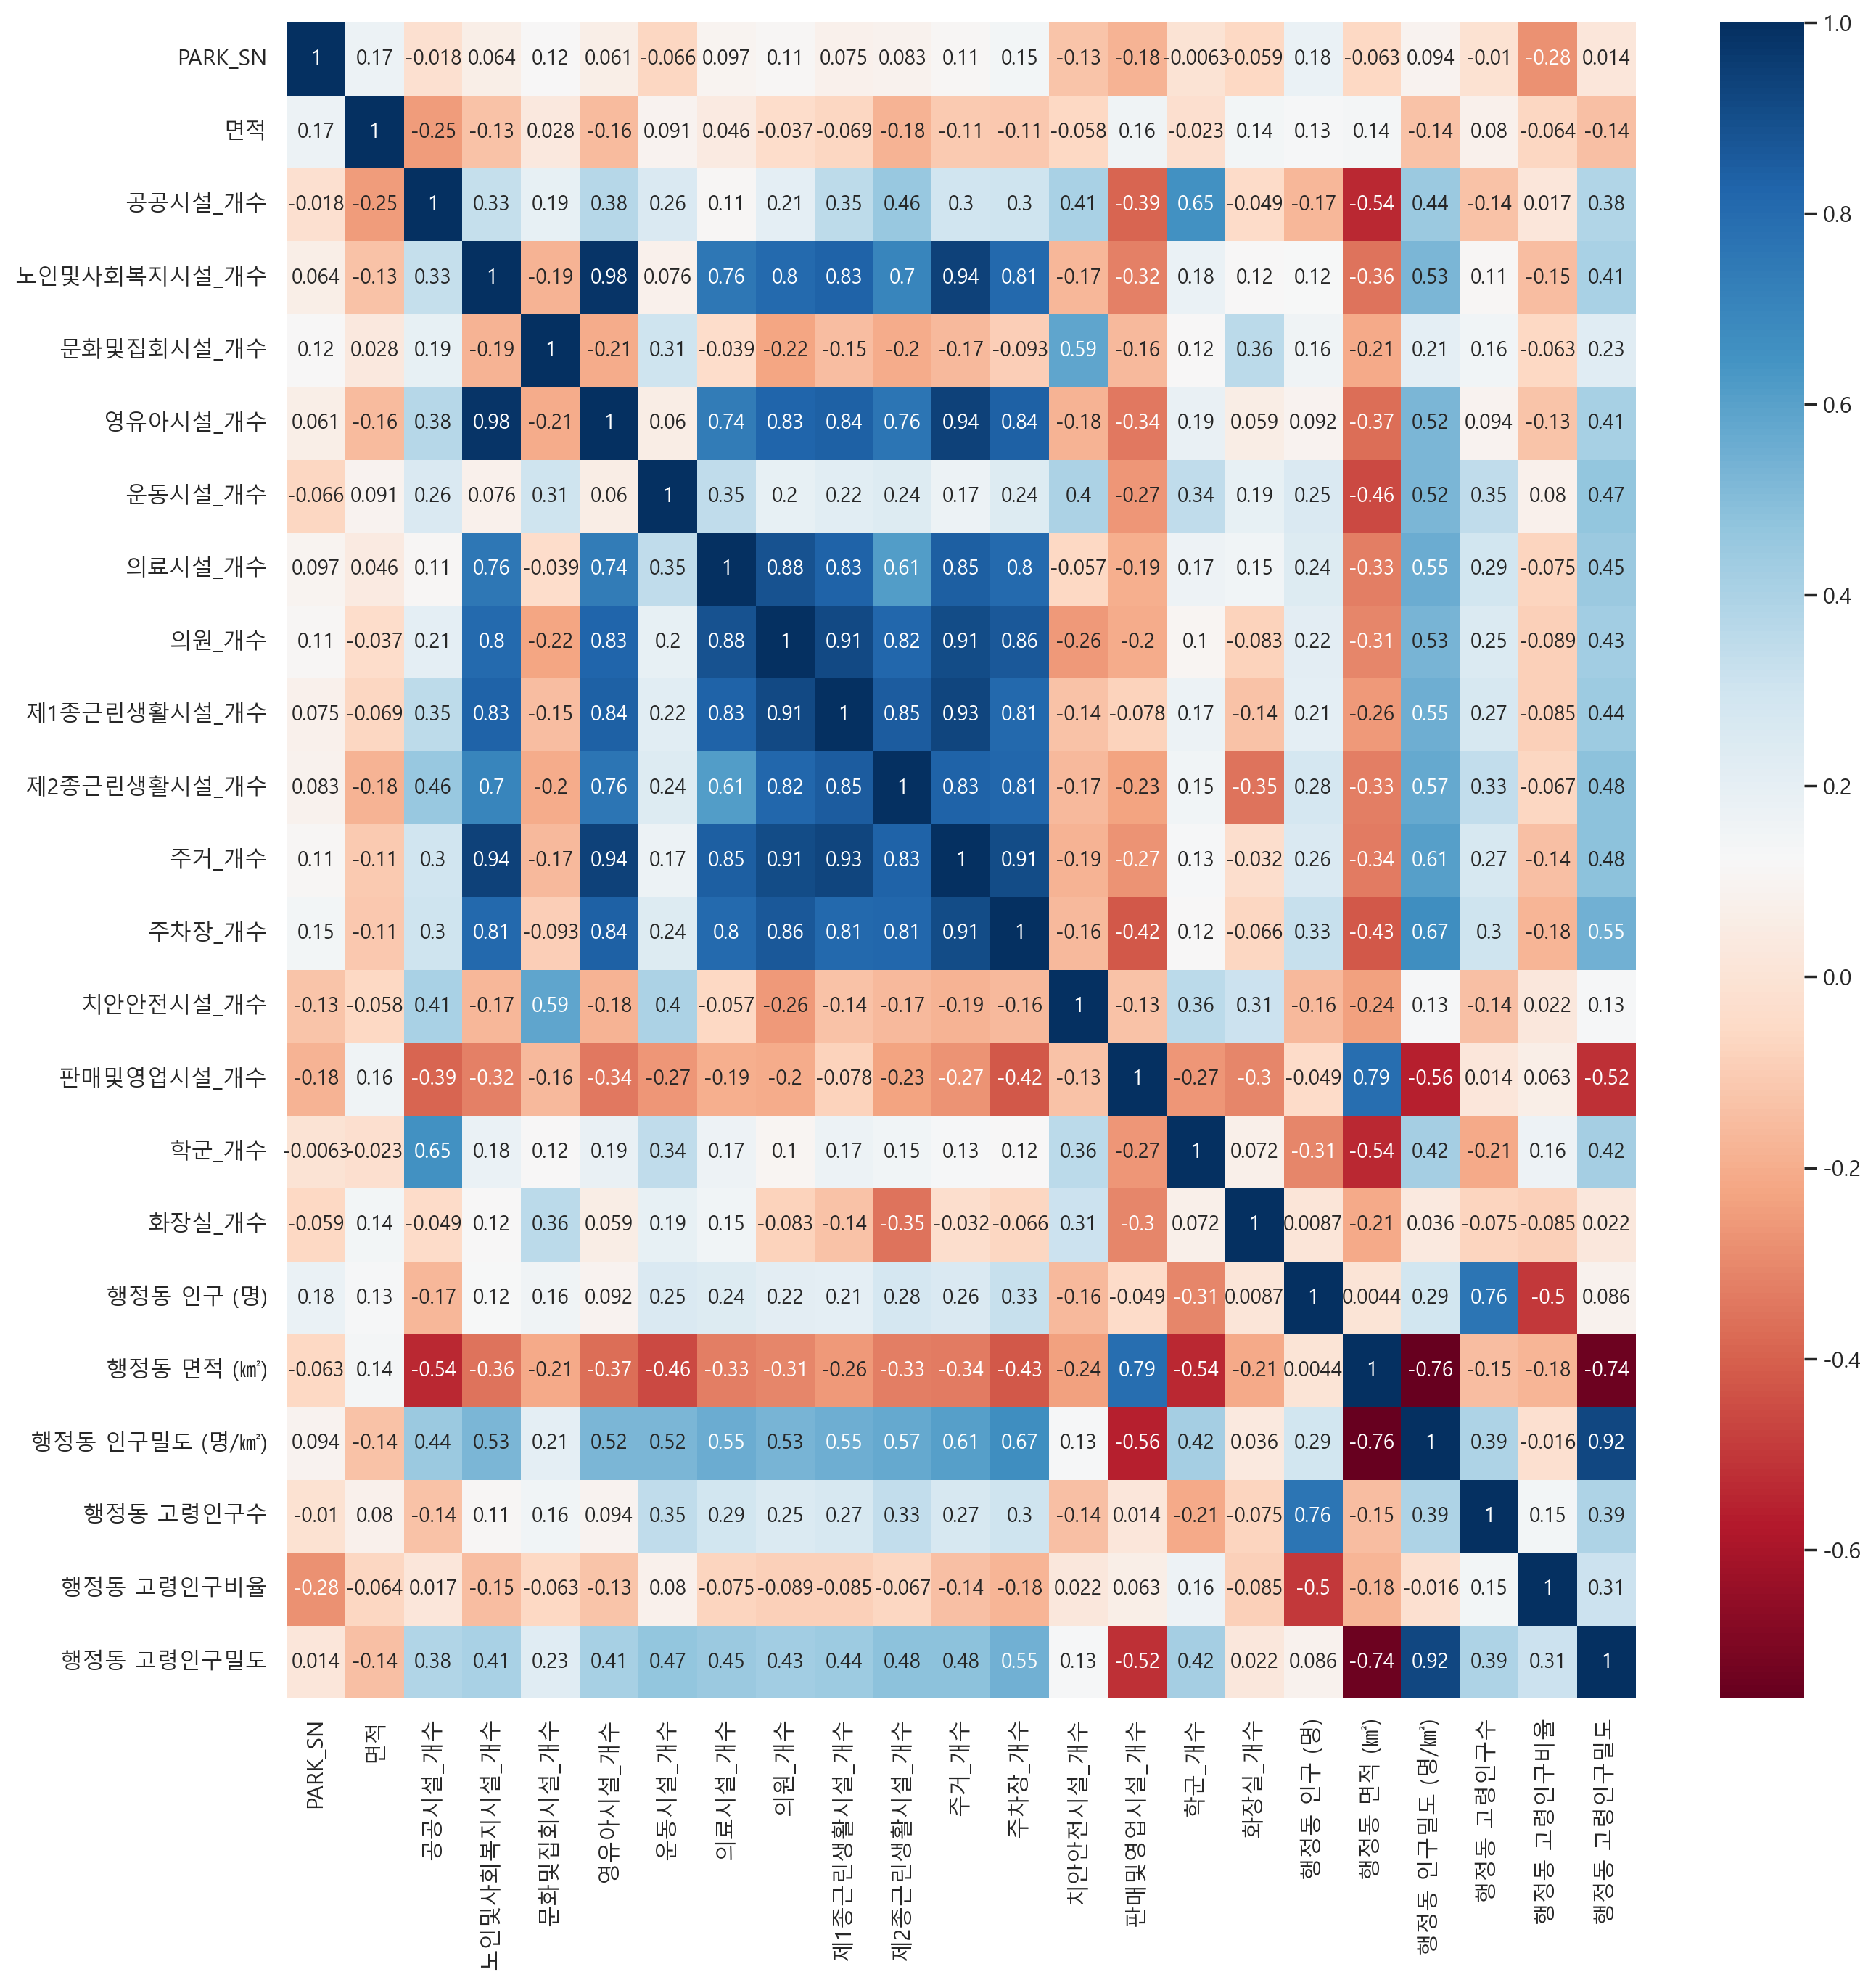

#### 수작업으로 분석

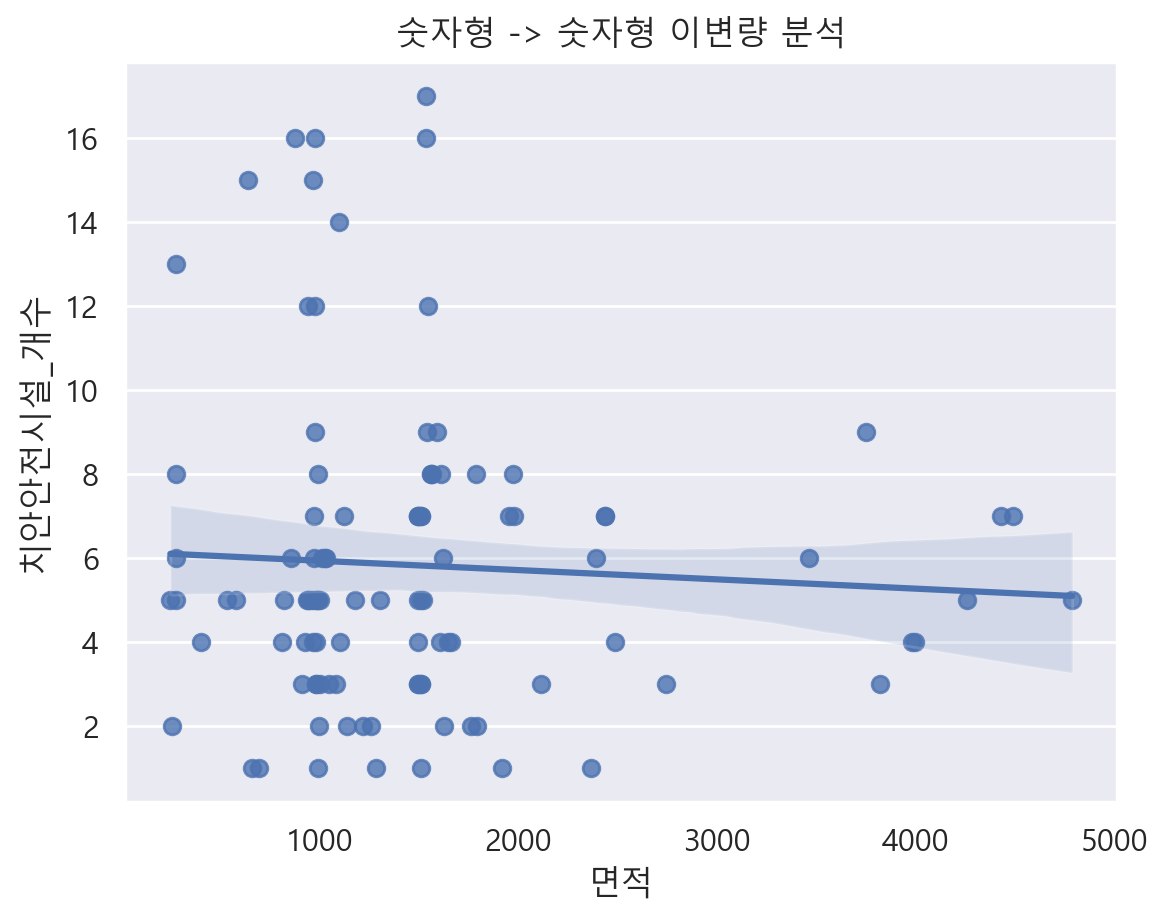

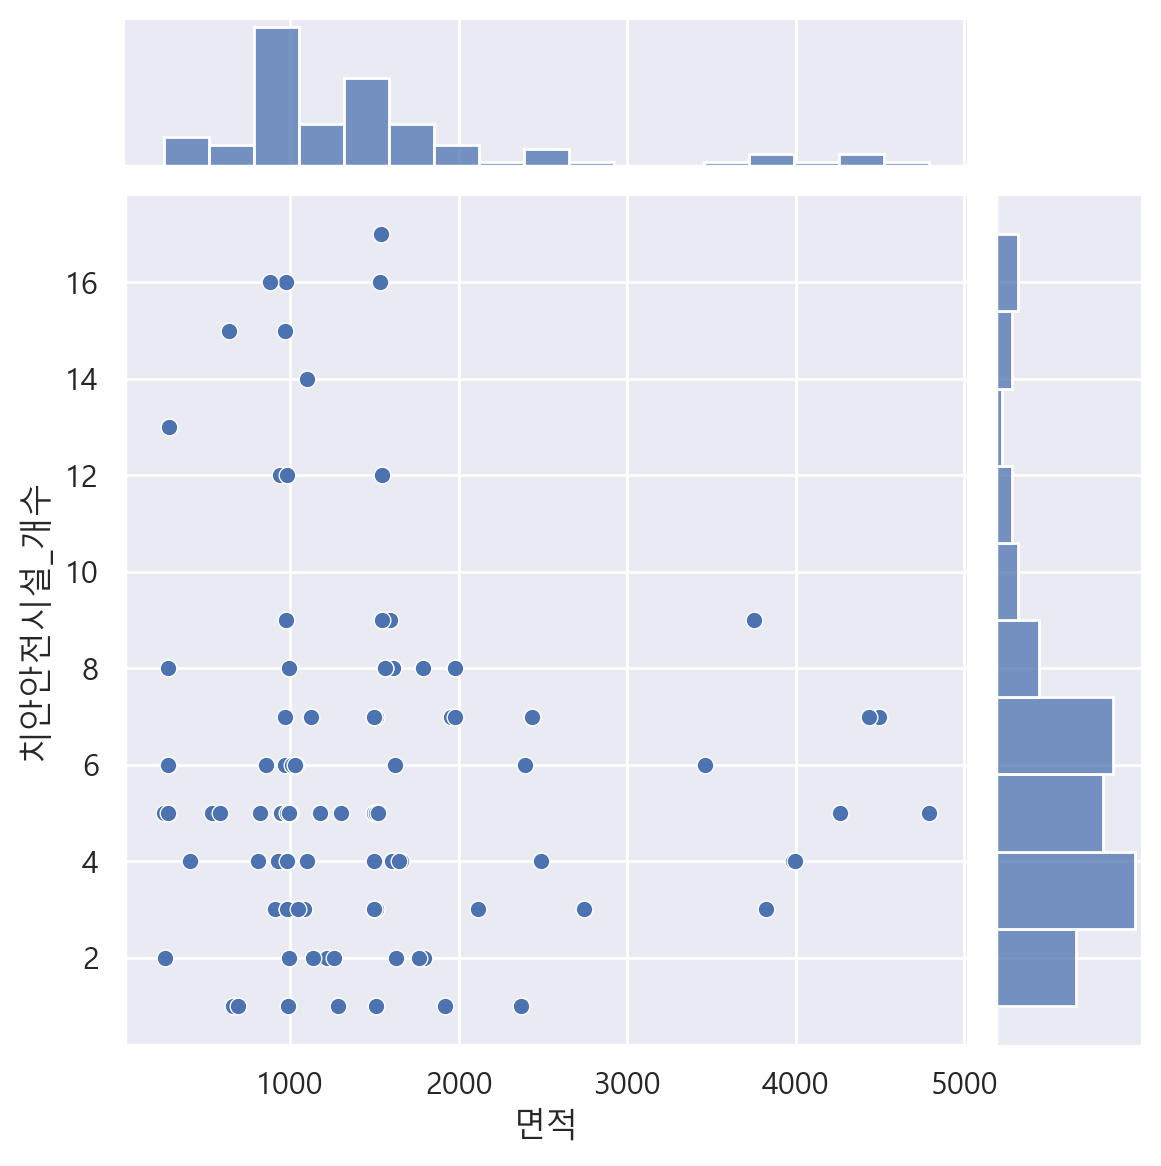

상관계수 : -0.058161735367957546, p-value : 0.5537077602889293
--------------------------------------------------


In [23]:
numerical_analysis(df_one, '면적', '치안안전시설_개수')

In [12]:
df=df_one.copy()

In [38]:
a.rename(columns={'PARK_SN':'행정동별 공원 갯수'},inplace=True)

In [39]:
a

,행정동별 공원 갯수
행정동,
화곡1동,10
우장산동,8
가양1동,7
등촌3동,7
방화2동,7
화곡본동,7
화곡3동,6
방화3동,6
방화1동,5


In [40]:
b= pd.merge(a,df_one,on='행정동',how='inner')

In [41]:
b

,행정동,행정동별 공원 갯수,PARK_SN,공원명,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,운동시설_개수,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
0,화곡1동,10,33,NaN,1977,5,29,11,32,5,...,8,13,59,2,52647,1.12,47006,8353,0.16,7458.04
1,화곡1동,10,35,은행공원,1125,4,33,10,35,4,...,7,10,34,2,52647,1.12,47006,8353,0.16,7458.04
2,화곡1동,10,36,월정공원,1180,7,32,9,31,2,...,5,13,55,1,52647,1.12,47006,8353,0.16,7458.04
3,화곡1동,10,38,필마공원,1607,6,26,6,32,5,...,4,9,40,1,52647,1.12,47006,8353,0.16,7458.04
4,화곡1동,10,41,곰돌이공원,1003,6,33,3,35,4,...,3,9,81,2,52647,1.12,47006,8353,0.16,7458.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,염창동,3,59,백합공원,939,9,21,4,22,4,...,5,7,73,3,41628,1.74,23924,4409,0.11,2533.91
102,염창동,3,97,NaN,258,3,11,2,11,4,...,2,4,39,6,41628,1.74,23924,4409,0.11,2533.91
103,가양3동,3,4,NaN,1499,3,3,1,3,2,...,5,10,71,3,14678,0.50,29356,3633,0.25,7266.00
104,가양3동,3,5,NaN,1611,6,5,6,5,2,...,8,11,79,3,14678,0.50,29356,3633,0.25,7266.00


In [42]:
df= b.copy()

In [14]:
df.columns

Index(['PARK_SN', '공원명', '행정동', '면적', '공공시설_개수', '노인및사회복지시설_개수', '문화및집회시설_개수',
       '영유아시설_개수', '운동시설_개수', '의료시설_개수', '의원_개수', '제1종근린생활시설_개수',
       '제2종근린생활시설_개수', '주거_개수', '주차장_개수', '치안안전시설_개수', '판매및영업시설_개수', '학군_개수',
       '화장실_개수', '행정동 인구 (명)', '행정동 면적 (㎢)', '행정동 인구밀도 (명/㎢)', '행정동 고령인구수',
       '행정동 고령인구비율', '행정동 고령인구밀도'],
      dtype='object')

In [ ]:
# 노인및사회복지시설_개수 : 영유아시설_개수, 의료시설_개수, 의원_개수, 제1종근린생활시설_개수, 제2종근린생활시설_개수, 주거_개수, 주차장_개수, 행정동 인구밀도, 

# 분석 시작


In [101]:
def numerical_analysis(df, x, y):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.suptitle(f'<< {x} & {y} (이변량 분석) >>', size=10)
    plt.subplots_adjust(wspace=0.4)
    
    sns.regplot(x=x, y=y, data=df, ax=axes[0])
    
    sns.kdeplot(data=df[x], data2=df[y], shade=True, ax=axes[1])

    result = pearsonr(x=df[x], y=df[y])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    
    plt.show()

In [43]:
df.columns

Index(['행정동', '행정동별 공원 갯수', 'PARK_SN', '공원명', '면적', '공공시설_개수', '노인및사회복지시설_개수',
       '문화및집회시설_개수', '영유아시설_개수', '운동시설_개수', '의료시설_개수', '의원_개수', '제1종근린생활시설_개수',
       '제2종근린생활시설_개수', '주거_개수', '주차장_개수', '치안안전시설_개수', '판매및영업시설_개수', '학군_개수',
       '화장실_개수', '행정동 인구 (명)', '행정동 면적 (㎢)', '행정동 인구밀도 (명/㎢)', '행정동 고령인구수',
       '행정동 고령인구비율', '행정동 고령인구밀도'],
      dtype='object')

In [27]:
mpl.rcParams['font.family']='Malgun Gothic'

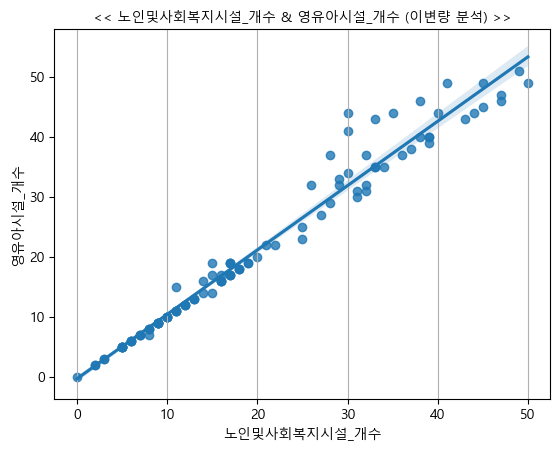

상관계수 : 0.9841783357079673, p-value : 5.426029067665845e-80
--------------------------------------------------


In [28]:
numerical_analysis(df,'노인및사회복지시설_개수','영유아시설_개수')

In [44]:
df.corr()

,행정동별 공원 갯수,PARK_SN,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,운동시설_개수,의료시설_개수,의원_개수,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
행정동별 공원 갯수,1.000000,0.076543,0.126677,-0.158620,0.147804,0.214625,0.133564,0.354566,0.389676,0.318892,...,-0.076737,-0.005359,-0.178506,0.026155,0.671554,-0.025400,0.319278,0.708354,-0.144424,0.232713
PARK_SN,0.076543,1.000000,0.174418,-0.017590,0.063736,0.115725,0.061435,-0.066441,0.096612,0.113900,...,-0.128524,-0.182592,-0.006296,-0.059201,0.177095,-0.062607,0.094135,-0.010015,-0.281464,0.014395
면적,0.126677,0.174418,1.000000,-0.251986,-0.134538,0.028234,-0.158034,0.090654,0.046308,-0.036874,...,-0.058162,0.160828,-0.022757,0.143042,0.129587,0.140850,-0.135330,0.079723,-0.063838,-0.142871
공공시설_개수,-0.158620,-0.017590,-0.251986,1.000000,0.334192,0.193819,0.375141,0.258780,0.109182,0.210925,...,0.409692,-0.390088,0.652496,-0.048909,-0.169702,-0.540238,0.444899,-0.136066,0.017468,0.383056
노인및사회복지시설_개수,0.147804,0.063736,-0.134538,0.334192,1.000000,-0.186054,0.984178,0.075628,0.756273,0.803184,...,-0.169744,-0.319626,0.182296,0.118947,0.123485,-0.357799,0.526506,0.113798,-0.152085,0.406730
문화및집회시설_개수,0.214625,0.115725,0.028234,0.193819,-0.186054,1.000000,-0.205140,0.307131,-0.038567,-0.221250,...,0.588077,-0.164850,0.119043,0.356083,0.157209,-0.211510,0.206774,0.155859,-0.062782,0.229367
영유아시설_개수,0.133564,0.061435,-0.158034,0.375141,0.984178,-0.205140,1.000000,0.059729,0.737998,0.826186,...,-0.182153,-0.343389,0.186987,0.059009,0.091835,-0.371479,0.521024,0.093630,-0.128862,0.413692
운동시설_개수,0.354566,-0.066441,0.090654,0.258780,0.075628,0.307131,0.059729,1.000000,0.345032,0.196521,...,0.396759,-0.268971,0.343410,0.193125,0.252633,-0.455123,0.523130,0.347766,0.080252,0.466877
의료시설_개수,0.389676,0.096612,0.046308,0.109182,0.756273,-0.038567,0.737998,0.345032,1.000000,0.884969,...,-0.056847,-0.193668,0.169067,0.151910,0.241353,-0.327576,0.554407,0.287921,-0.075079,0.450305
의원_개수,0.318892,0.113900,-0.036874,0.210925,0.803184,-0.221250,0.826186,0.196521,0.884969,1.000000,...,-0.259503,-0.203848,0.102752,-0.083066,0.216762,-0.308079,0.528381,0.248957,-0.089115,0.425134


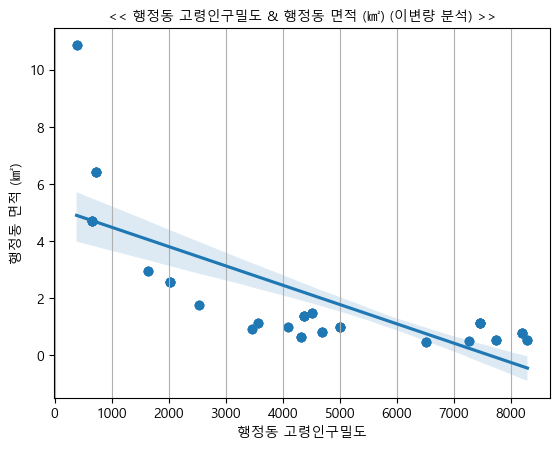

상관계수 : -0.7390240552318856, p-value : 1.51180131624909e-19
--------------------------------------------------


In [32]:
numerical_analysis(df,'행정동 고령인구밀도','행정동 면적 (㎢)')

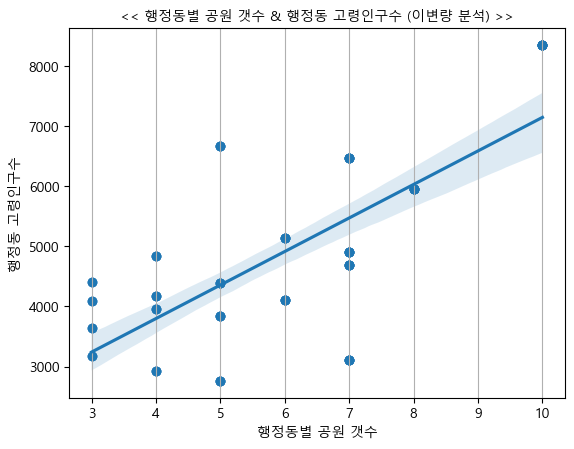

상관계수 : 0.7083543983034692, p-value : 2.016910818538349e-17
--------------------------------------------------


In [45]:
numerical_analysis(df,'행정동별 공원 갯수','행정동 고령인구수')

In [47]:
df.columns

Index(['행정동', '행정동별 공원 갯수', 'PARK_SN', '공원명', '면적', '공공시설_개수', '노인및사회복지시설_개수',
       '문화및집회시설_개수', '영유아시설_개수', '운동시설_개수', '의료시설_개수', '의원_개수', '제1종근린생활시설_개수',
       '제2종근린생활시설_개수', '주거_개수', '주차장_개수', '치안안전시설_개수', '판매및영업시설_개수', '학군_개수',
       '화장실_개수', '행정동 인구 (명)', '행정동 면적 (㎢)', '행정동 인구밀도 (명/㎢)', '행정동 고령인구수',
       '행정동 고령인구비율', '행정동 고령인구밀도'],
      dtype='object')

In [52]:
re=df.groupby('행정동')[['공공시설_개수','노인및사회복지시설_개수','치안안전시설_개수', '영유아시설_개수','운동시설_개수','의료시설_개수']].sum()

In [58]:
re.reset_index(drop=False,inplace=True)

In [61]:
re.rename(columns={'공공시설_개수': '행정동별_공공시설개수','노인및사회복지시설_개수':'행정동별_노인복지시설개수',
                  '치안안전시설_개수':'행정동별_치안시설개수','영유아시설_개수':'행정동별_영유아시설개수','운동시설_개수':'행정동별_운동시설개수',
                  '의료시설_개수':'행정동별_의료시설개수'},inplace=True)

In [62]:
a= pd.merge(re,df,how='inner')
a

,행정동,행정동별_공공시설개수,행정동별_노인복지시설개수,행정동별_치안시설개수,행정동별_영유아시설개수,행정동별_운동시설개수,행정동별_의료시설개수,행정동별 공원 갯수,PARK_SN,공원명,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
0,가양1동,21,41,39,41,8,13,7,1,NaN,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
1,가양1동,21,41,39,41,8,13,7,14,아름공원,...,7,12,47,7,34359,4.70,7310,3106,0.09,660.85
2,가양1동,21,41,39,41,8,13,7,85,가양어린이공원,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
3,가양1동,21,41,39,41,8,13,7,96,문화공원,...,9,17,66,7,34359,4.70,7310,3106,0.09,660.85
4,가양1동,21,41,39,41,8,13,7,121,NaN,...,1,7,24,2,34359,4.70,7310,3106,0.09,660.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,화곡본동,26,277,42,280,24,233,7,64,비둘기공원,...,4,7,50,7,34121,0.98,34817,4899,0.14,4998.98
102,화곡본동,26,277,42,280,24,233,7,65,박장공원,...,4,6,78,8,34121,0.98,34817,4899,0.14,4998.98
103,화곡본동,26,277,42,280,24,233,7,66,한글공원,...,4,4,80,9,34121,0.98,34817,4899,0.14,4998.98
104,화곡본동,26,277,42,280,24,233,7,101,볏골공원,...,5,8,33,6,34121,0.98,34817,4899,0.14,4998.98


In [54]:
re.corr()

,공공시설_개수,노인및사회복지시설_개수,치안안전시설_개수,영유아시설_개수,운동시설_개수,의료시설_개수
공공시설_개수,1.000000,0.632103,0.628424,0.653295,0.746081,0.615577
노인및사회복지시설_개수,0.632103,1.000000,0.141027,0.993261,0.549318,0.901507
치안안전시설_개수,0.628424,0.141027,1.000000,0.116688,0.705050,0.268444
영유아시설_개수,0.653295,0.993261,0.116688,1.000000,0.520442,0.884914
운동시설_개수,0.746081,0.549318,0.705050,0.520442,1.000000,0.706177
의료시설_개수,0.615577,0.901507,0.268444,0.884914,0.706177,1.000000


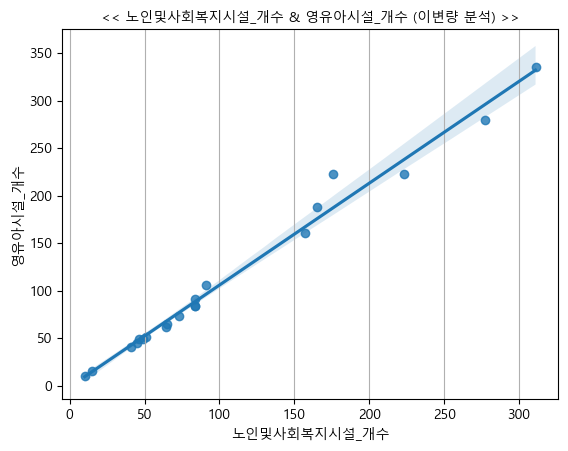

상관계수 : 0.9932605354057703, p-value : 2.6584090177872745e-18
--------------------------------------------------


In [55]:
numerical_analysis(re,'노인및사회복지시설_개수','영유아시설_개수')

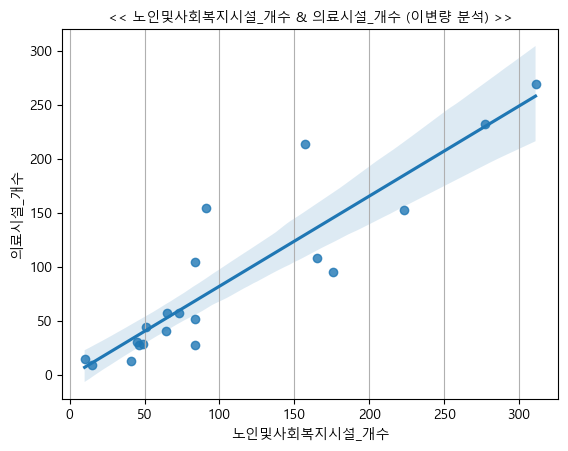

상관계수 : 0.9015074284144274, p-value : 5.7668420549385535e-08
--------------------------------------------------


In [56]:
numerical_analysis(re,'노인및사회복지시설_개수','의료시설_개수')

In [63]:
a.corr()

,행정동별_공공시설개수,행정동별_노인복지시설개수,행정동별_치안시설개수,행정동별_영유아시설개수,행정동별_운동시설개수,행정동별_의료시설개수,행정동별 공원 갯수,PARK_SN,면적,공공시설_개수,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
행정동별_공공시설개수,1.000000,0.663834,0.587029,0.685688,0.810674,0.659226,0.661498,0.047606,-0.134628,0.487935,...,0.204062,-0.395544,0.293279,-0.049854,0.445042,-0.511490,0.725668,0.524705,-0.079414,0.606821
행정동별_노인복지시설개수,0.663834,1.000000,0.129631,0.994519,0.628584,0.910582,0.613287,0.109764,-0.027899,0.163975,...,-0.185121,-0.293672,0.014889,0.008736,0.498403,-0.323091,0.618380,0.518463,-0.162388,0.474159
행정동별_치안시설개수,0.587029,0.129631,1.000000,0.108815,0.699807,0.259299,0.542138,0.002919,0.059250,0.200781,...,0.577884,-0.214755,0.197849,0.362170,0.258982,-0.273051,0.363017,0.295301,-0.083622,0.322092
행정동별_영유아시설개수,0.685688,0.994519,0.108815,1.000000,0.608272,0.897415,0.598876,0.106463,-0.052822,0.196668,...,-0.194908,-0.309271,0.029923,-0.028047,0.475122,-0.335629,0.619068,0.504599,-0.144309,0.484325
행정동별_운동시설개수,0.810674,0.628584,0.699807,0.608272,1.000000,0.750683,0.822500,0.032860,0.049263,0.124085,...,0.160228,-0.270783,0.115872,0.128040,0.617599,-0.381578,0.641631,0.728366,-0.018453,0.549536
행정동별_의료시설개수,0.659226,0.910582,0.259299,0.897415,0.750683,1.000000,0.735240,0.147953,0.051023,0.049801,...,-0.157336,-0.206698,0.013876,0.044865,0.547036,-0.291516,0.603102,0.600704,-0.106077,0.471055
행정동별 공원 갯수,0.661498,0.613287,0.542138,0.598876,0.822500,0.735240,1.000000,0.076543,0.126677,-0.158620,...,-0.076737,-0.005359,-0.178506,0.026155,0.671554,-0.025400,0.319278,0.708354,-0.144424,0.232713
PARK_SN,0.047606,0.109764,0.002919,0.106463,0.032860,0.147953,0.076543,1.000000,0.174418,-0.017590,...,-0.128524,-0.182592,-0.006296,-0.059201,0.177095,-0.062607,0.094135,-0.010015,-0.281464,0.014395
면적,-0.134628,-0.027899,0.059250,-0.052822,0.049263,0.051023,0.126677,0.174418,1.000000,-0.251986,...,-0.058162,0.160828,-0.022757,0.143042,0.129587,0.140850,-0.135330,0.079723,-0.063838,-0.142871
공공시설_개수,0.487935,0.163975,0.200781,0.196668,0.124085,0.049801,-0.158620,-0.017590,-0.251986,1.000000,...,0.409692,-0.390088,0.652496,-0.048909,-0.169702,-0.540238,0.444899,-0.136066,0.017468,0.383056


In [65]:
b=a.copy()
b=b.set_index('행정동')


,행정동별_공공시설개수,행정동별_노인복지시설개수,행정동별_치안시설개수,행정동별_영유아시설개수,행정동별_운동시설개수,행정동별_의료시설개수,행정동별 공원 갯수,PARK_SN,공원명,면적,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
행정동,,,,,,,,,,,,,,,,,,,,,
가양1동,21,41,39,41,8,13,7,1,NaN,1510,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
가양1동,21,41,39,41,8,13,7,14,아름공원,1955,...,7,12,47,7,34359,4.70,7310,3106,0.09,660.85
가양1동,21,41,39,41,8,13,7,85,가양어린이공원,1499,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
가양1동,21,41,39,41,8,13,7,96,문화공원,3751,...,9,17,66,7,34359,4.70,7310,3106,0.09,660.85
가양1동,21,41,39,41,8,13,7,121,NaN,1510,...,1,7,24,2,34359,4.70,7310,3106,0.09,660.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화곡본동,26,277,42,280,24,233,7,64,비둘기공원,1102,...,4,7,50,7,34121,0.98,34817,4899,0.14,4998.98
화곡본동,26,277,42,280,24,233,7,65,박장공원,930,...,4,6,78,8,34121,0.98,34817,4899,0.14,4998.98
화곡본동,26,277,42,280,24,233,7,66,한글공원,983,...,4,4,80,9,34121,0.98,34817,4899,0.14,4998.98


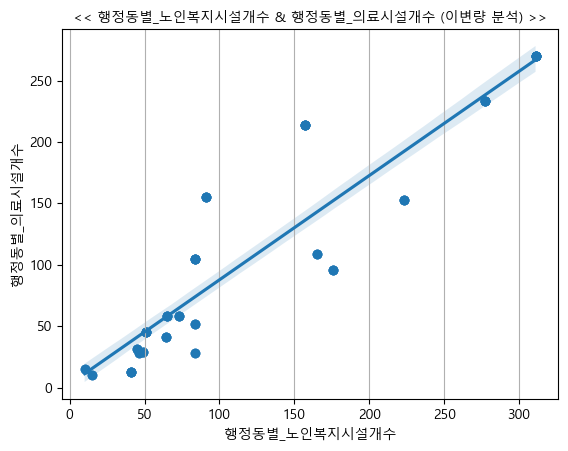

상관계수 : 0.9105823877741442, p-value : 1.0637500428548425e-41
--------------------------------------------------


In [67]:
numerical_analysis(a,'행정동별_노인복지시설개수','행정동별_의료시설개수')

Text(0.5, 1.0, 'Kernel Density Plot')

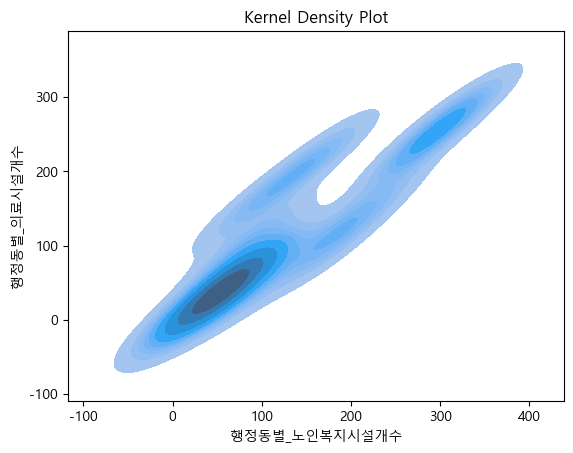

In [69]:
ax = sns.kdeplot(data=a['행정동별_노인복지시설개수'],
           data2=a['행정동별_의료시설개수'],
           shade=True) # shade=True 
ax.set_title('Kernel Density Plot')

In [114]:
def numerical_analysis(df, x, y):
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.suptitle(f'<< {x} & {y} (이변량 분석) >>', size=10)
    
    
    sns.regplot(x=x, y=y, data=df, ax=axes[0])
    
    sns.kdeplot(data=df[x], data2=df[y], shade=True, ax=axes[1])

    result = pearsonr(x=df[x], y=df[y])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    
    plt.show()

상관계수 : 0.9105823877741442, p-value : 1.0637500428548425e-41


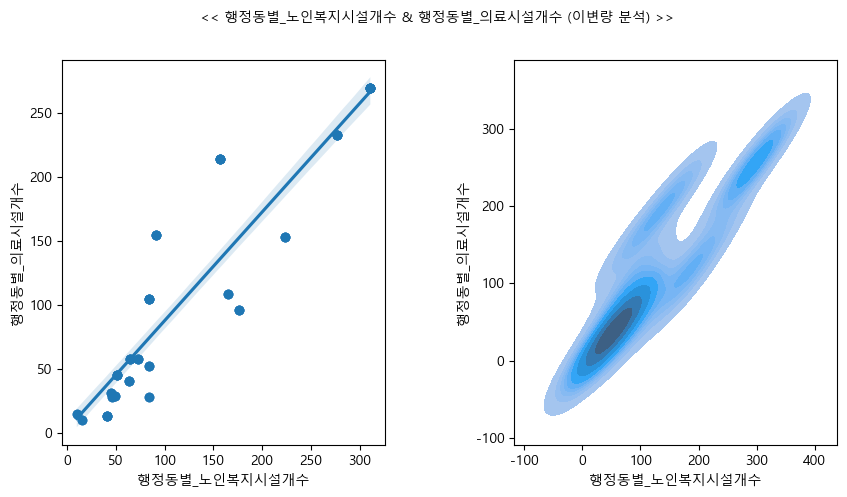

In [117]:

numerical_analysis1(a,'행정동별_노인복지시설개수','행정동별_의료시설개수')

In [118]:
a.to_csv('종합데이터.csv',index=False)

In [120]:
pd.read_csv('종합데이터.csv')

,행정동,행정동별_공공시설개수,행정동별_노인복지시설개수,행정동별_치안시설개수,행정동별_영유아시설개수,행정동별_운동시설개수,행정동별_의료시설개수,행정동별 공원 갯수,PARK_SN,공원명,...,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도
0,가양1동,21,41,39,41,8,13,7,1,NaN,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
1,가양1동,21,41,39,41,8,13,7,14,아름공원,...,7,12,47,7,34359,4.70,7310,3106,0.09,660.85
2,가양1동,21,41,39,41,8,13,7,85,가양어린이공원,...,7,10,42,7,34359,4.70,7310,3106,0.09,660.85
3,가양1동,21,41,39,41,8,13,7,96,문화공원,...,9,17,66,7,34359,4.70,7310,3106,0.09,660.85
4,가양1동,21,41,39,41,8,13,7,121,NaN,...,1,7,24,2,34359,4.70,7310,3106,0.09,660.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,화곡본동,26,277,42,280,24,233,7,64,비둘기공원,...,4,7,50,7,34121,0.98,34817,4899,0.14,4998.98
102,화곡본동,26,277,42,280,24,233,7,65,박장공원,...,4,6,78,8,34121,0.98,34817,4899,0.14,4998.98
103,화곡본동,26,277,42,280,24,233,7,66,한글공원,...,4,4,80,9,34121,0.98,34817,4899,0.14,4998.98
104,화곡본동,26,277,42,280,24,233,7,101,볏골공원,...,5,8,33,6,34121,0.98,34817,4899,0.14,4998.98


상관계수 : 0.9105823877741442, p-value : 1.0637500428548425e-41


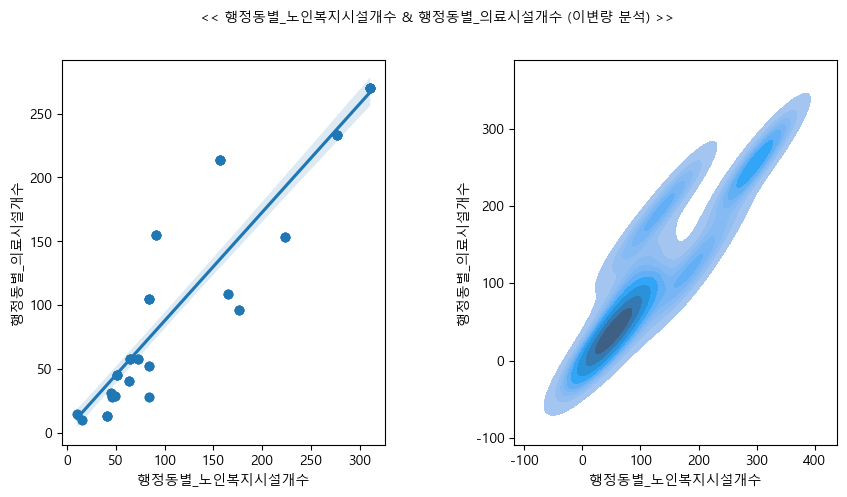

In [126]:
numerical_analysis1(a,'행정동별_노인복지시설개수','행정동별_의료시설개수')